In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

attendance_df = pd.read_csv('../data/matches_transformed.csv', sep=',')

X = attendance_df.drop('attendance', axis=1)
y = attendance_df['attendance']

In [2]:
## Features standardisieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_sc = scaler.transform(X)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

models = [
    # LinearRegression(),
    Lasso(alpha=0.5011872336272735),
    Ridge(alpha=0.006579332246575682),
    KNeighborsRegressor(p = 2, n_neighbors=4),
    DecisionTreeRegressor(max_depth=4),
    RandomForestRegressor(n_estimators= 200),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    HistGradientBoostingRegressor(),
    MLPRegressor(max_iter=35000)
]

In [10]:
from sklearn.model_selection import cross_val_score
kfold = 5
model_names = []
model_scores = []

for model in models:
    model_name = model.__class__.__name__
    print(model_name)
    model.fit(X_sc, y)

    scores = cross_val_score(model, X_sc, y, cv=kfold)
    for i in range(len(scores)):
        model_scores.append(scores[i])
        model_names.append(model_name)
print('done')

Lasso
Ridge
KNeighborsRegressor
DecisionTreeRegressor
RandomForestRegressor
AdaBoostRegressor
GradientBoostingRegressor
HistGradientBoostingRegressor
MLPRegressor
done



mean
                                 scores
names                                  
AdaBoostRegressor              0.636588
DecisionTreeRegressor          0.675981
GradientBoostingRegressor      0.802413
HistGradientBoostingRegressor  0.832997
KNeighborsRegressor            0.731610
Lasso                          0.788286
MLPRegressor                  -1.310792
RandomForestRegressor          0.818471
Ridge                          0.788144

std
                                 scores
names                                  
AdaBoostRegressor              0.181906
DecisionTreeRegressor          0.157477
GradientBoostingRegressor      0.096203
HistGradientBoostingRegressor  0.107378
KNeighborsRegressor            0.124380
Lasso                          0.107188
MLPRegressor                   4.665447
RandomForestRegressor          0.122365
Ridge                          0.107415


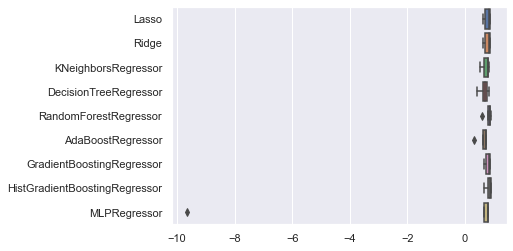

In [11]:
res_df = pd.DataFrame({
    'names' : model_names,
    'scores' : model_scores
})
print('\nmean')
print(res_df.groupby(['names']).mean())
print('\nstd')
print(res_df.groupby(['names']).std())

sns.boxplot(x=model_scores, y=model_names)
plt.show()